This code is siumlating the oobservation by Nate Silver about herding in poll

Link# https://www.natesilver.net/p/theres-more-herding-in-swing-state

The method is inspired by @jonathan interviews

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
#Simulation parameters
np.random.seed (5208)
sample_size_survey = 1000
true_p_trump = 0.5
true_p_harris = 1-true_p_trump

In [8]:
#Random Survey results drawn from binomial distribution
trump_voters_survey = np.random.binomial(sample_size_survey, true_p_trump)
trump_pct_sample = trump_voters_survey/sample_size_survey
harris_pct_sample = (sample_size_survey-trump_voters_survey)/sample_size_survey

print ("Trump Survey Votes:", trump_voters_survey)
print("Trump Survey Share: {:.3}".format(trump_pct_sample))
print("Harris Survey Share: {:.3}".format(harris_pct_sample))

Trump Survey Votes: 497
Trump Survey Share: 0.497
Harris Survey Share: 0.503


So with one experiment, we get a results of 49.7 vs 50.3 due to random chnace errors.

So, simulating experiment "n" number of times

In [10]:
def gen_survey_data(sample_size_survey, true_p_trump, num_surveys):
    trump_voters = np.random.binomial(sample_size_survey, true_p_trump, num_surveys)
    trump_pct = trump_voters/sample_size_survey
    harris_pct = 1-trump_pct
    trum_harris_gap = trump_pct-harris_pct
    trump_error = true_p_trump-trump_pct
    harris_error = true_p_harris-harris_pct
    results_df = pd.DataFrame({"trump_pct": trump_pct, "harris_pct": harris_pct, "trum_harris_gap": trum_harris_gap, "trump_error": trump_error, "harris_error": harris_error})
    return results_df


In [13]:
num_surveys = 10
results_df = 100*gen_survey_data(sample_size_survey, true_p_trump, num_surveys).round(2)
results_df

,trump_pct,harris_pct,trum_harris_gap,trump_error,harris_error
0,52.0,48.0,4.0,-2.0,2.0
1,50.0,50.0,-0.0,0.0,-0.0
2,50.0,50.0,-1.0,0.0,-0.0
3,54.0,46.0,7.0,-4.0,4.0
4,54.0,46.0,7.0,-4.0,4.0
5,50.0,50.0,-0.0,0.0,-0.0
6,51.0,49.0,3.0,-1.0,1.0
7,47.0,53.0,-6.0,3.0,-3.0
8,51.0,49.0,3.0,-1.0,1.0
9,48.0,52.0,-5.0,3.0,-3.0


In [19]:
num_surveys = 10000
results = gen_survey_data(sample_size_survey, true_p_trump, num_surveys)

trump_error_p2_5 = results["trump_error"].quantile(0.025)
trump_error_p97_5 = results["trump_error"].quantile(0.975)

harris_error_p2_5= results["harris_error"].quantile(0.025)
harris_error_p97_5= results["harris_error"].quantile(0.975)

trum_harris_gap_p2_5 = results["trum_harris_gap"].quantile(0.025)
trum_harris_gap_p97_5 = results["trum_harris_gap"].quantile(0.975)

In [32]:
print(trump_error_p2_5, trump_error_p97_5)
print(harris_error_p2_5, harris_error_p97_5)
print(trum_harris_gap_p2_5, trum_harris_gap_p97_5)

-0.031000000000000028 0.031000000000000028
-0.031000000000000028 0.031000000000000028
-0.062000000000000055 0.062000000000000055


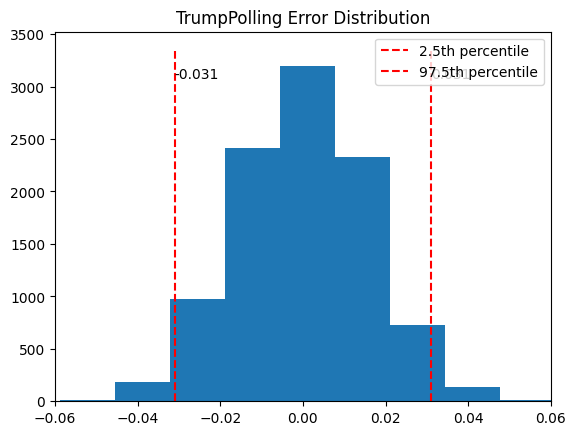

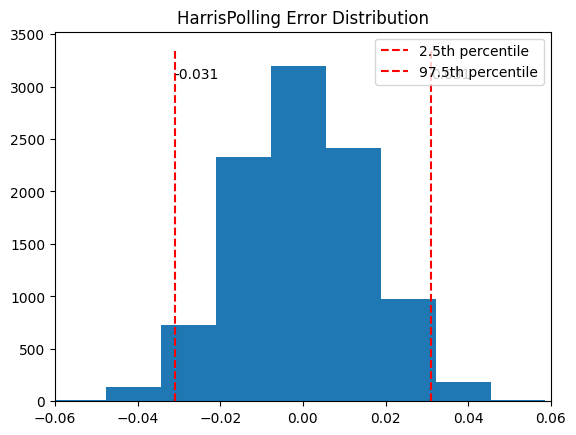

In [27]:
Percentile = {
    "trump": (trump_error_p2_5, trump_error_p97_5),
    "harris": (harris_error_p2_5, harris_error_p97_5),
}
#print(Percentile)
candidates = ["trump", "harris"]

for candidate in candidates:
    plt.figure()
    plt.hist(results[f'{candidate}_error'], bins =10)
    plt.title(f"{candidate.capitalize()}Polling Error Distribution")

    #Get the current y-axis limits
    y_min, y_max = plt.ylim()
    p2_5, p97_5 = Percentile[candidate]

    #Add Vertical Lines for percentile
    plt.vlines(p2_5, y_min, y_max, color="red", linestyle= "--", label="2.5th percentile")
    plt.vlines(p97_5, y_min, y_max, color="red", linestyle= "--", label="97.5th percentile")

    plt.xlim([-0.06,0.06])

    #Add test labels near the lines
    plt.text(p2_5, y_max*0.95, f"{p2_5:.3f}", rotation = 0, verticalalignment="top")
    plt.text(p97_5, y_max*0.95, f"{p97_5:.3f}", rotation = 0, verticalalignment="top")

    plt.legend()
    plt.show()



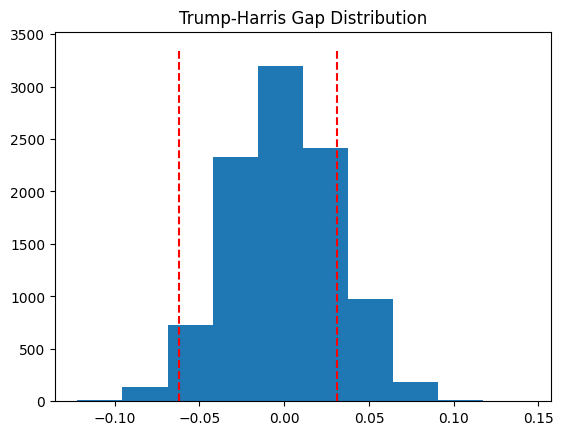

In [34]:
percentiles = {
    "trump_harris_gap": (trum_harris_gap_p2_5, trum_harris_gap_p97_5)
}

plt.figure()
plt.hist(results["trum_harris_gap"], bins =10)
plt.title(f"Trump-Harris Gap Distribution")

# Y-axis limits

y_min, y_max = plt.ylim()
p2_5, p97 = percentiles["trump_harris_gap"]

#Add Vertical Lines for percentile
plt.vlines(p2_5, y_min, y_max, color="red", linestyle= "--", label="2.5th percentile")
plt.vlines(p97_5, y_min, y_max, color="red", linestyle= "--", label="97.5th percentile")


Few Observations:

1. So the error rate is closely bunched around O with the error rate being 3% for the error distribution
2. As it 1 for 1, the gap swings from 6% on either side. So a error rate of 3 % for trump means 3% for harris as well

In [33]:
#proportion of surveys showing gap less that 2.5 points in either direction

gap_less_than_2_5 = (results["trum_harris_gap"]>=-0.025) & (results["trum_harris_gap"]<=0.025)
np.mean(gap_less_than_2_5)

0.5703

57% of the surveys (out of 10000 survey conduted, each survey having 1000 participants) have less that 2.5 points in either direction. this is the observation made by Nate silver when he commented that 80% of the polls in swing state were less than in 2.5 points in either directions.  

In [37]:
np.random.seed(42)
gaps = list()
num_experiments = 10000# where one experimnet is 229 set of surveys
num_surveys=229
survey_sample_size= 900
trump_true_p = 0.5

for i in range(num_experiments):
  results=gen_survey_data(survey_sample_size, trump_true_p, num_surveys)
  gaps_within_2_5 = (results["trum_harris_gap"]>=-0.025) & (results["trum_harris_gap"]<=0.025)
  gaps.append(np.mean(gaps_within_2_5))


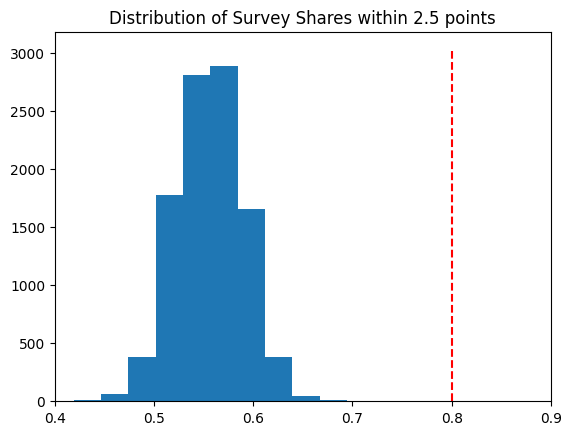

In [38]:
plt.hist(gaps, bins=10)
plt.title ("Distribution of Survey Shares within 2.5 points")
plt.xlim([0.4,0.9])
y_min, y_max = plt.ylim()
plt.vlines(0.8, y_min, y_max, color="red", linestyle= "--", label="80pct of polls within 2.5 points")
plt.show()

In [39]:
# Probability of getting 80 % of survey within 2.5 points
t_stat = (0.80-np.mean(gaps))/np.std(gaps)
#This calcualtes t-statistic and then uses it to determine the probability of observing a sample mean of 0.8 or less, given a null hypothesis is np.mean(gaps) or 0.556
print(t_stat)
print(stats.norm.cdf(-1*t_stat))

7.318163036022451
1.256941679266891e-13
